In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
df = pd.read_csv("./DATA/fake_reg.csv")

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [4]:
# kind of a regression problem wherein based
# on the feature1 and feature2 we'll attempt
# to predict the price of it

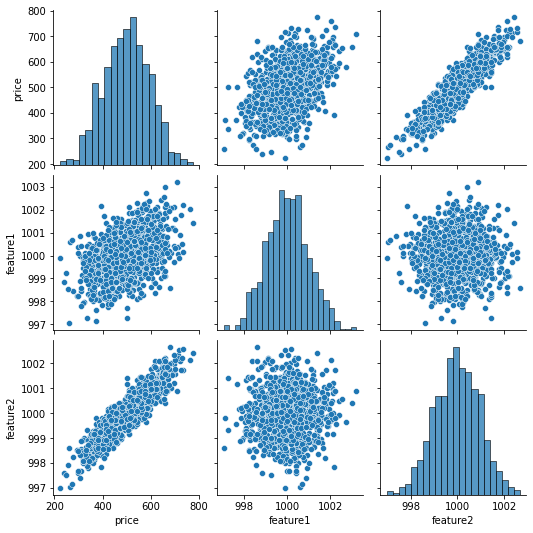

In [5]:
sns.pairplot(df)

In [6]:
# feature2 seems to have very high 
# correlation with the actual price

In [7]:
# cz of it is a fake data

- 1. read in the data
- 2. do feature engineering over it
- 3. test train split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df[['feature1','feature2']].values

In [10]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [11]:
y = df['price'].values

In [12]:
# y

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [14]:
X_train.shape

(700, 2)

In [15]:
X_test.shape

(300, 2)

In [16]:
# scale your data

In [17]:
# always a good practise

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
# help(MinMaxScaler)

In [20]:
scaler = MinMaxScaler()

In [21]:
scaler.fit(X_train)

MinMaxScaler()

In [22]:
# calcultes the min max and std scaler

In [23]:
X_train = scaler.transform(X_train)

In [24]:
X_test = scaler.transform(X_test)

In [25]:
X_train.min()

0.0

In [26]:
X_train.max()

1.0

In [27]:
X_test.min()

-0.014108392024525074

In [28]:
X_test.max()

0.9575292620125708

In [29]:
# we see that our data is scaled now
# essentially btwn 0 - 1

* Building the Neural Network model

### keras syntax basics

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

In [31]:
# help(Sequential)

In [32]:
# help(Dense)

In [33]:
# model = Sequential([Dense(units=4,activation='relu'),
#                    Dense(units=2,activation='relu'),
#                    Dense(units=1)])

# 1 inp and 1 hidden 1 output layer

# Just your regular densely-connected NN layer.
# units = no of neurons in the layer
# activation  = name of activation funcn

In [34]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

# mostly used

In [35]:
# last layer would produce price only one
# thing so one neuron

In [36]:
model.compile(optimizer='rmsprop',loss='mse')


#### choosing loss function ?

* multi-classification problem
    * loss = 'categorical_crossentropy'

* binary-classification
    * loss = 'binary_crossentropy'
    
* regression problem
    * loss = 'mean squared error (mse)'

In [37]:
# train the model

In [38]:
model.fit(x=X_train,y=y_train, epochs=250,verbose=2)

Epoch 1/250
22/22 - 0s - loss: 258971.7656
Epoch 2/250
22/22 - 0s - loss: 258831.4531
Epoch 3/250
22/22 - 0s - loss: 258689.6719
Epoch 4/250
22/22 - 0s - loss: 258533.7344
Epoch 5/250
22/22 - 0s - loss: 258361.3906
Epoch 6/250
22/22 - 0s - loss: 258170.1250
Epoch 7/250
22/22 - 0s - loss: 257932.0156
Epoch 8/250
22/22 - 0s - loss: 257652.4531
Epoch 9/250
22/22 - 0s - loss: 257342.2812
Epoch 10/250
22/22 - 0s - loss: 256990.4062
Epoch 11/250
22/22 - 0s - loss: 256578.7500
Epoch 12/250
22/22 - 0s - loss: 256097.6875
Epoch 13/250
22/22 - 0s - loss: 255536.9375
Epoch 14/250
22/22 - 0s - loss: 254900.6875
Epoch 15/250
22/22 - 0s - loss: 254188.5312
Epoch 16/250
22/22 - 0s - loss: 253400.5469
Epoch 17/250
22/22 - 0s - loss: 252525.5156
Epoch 18/250
22/22 - 0s - loss: 251555.6875
Epoch 19/250
22/22 - 0s - loss: 250486.7812
Epoch 20/250
22/22 - 0s - loss: 249319.5156
Epoch 21/250
22/22 - 0s - loss: 248041.8750
Epoch 22/250
22/22 - 0s - loss: 246649.8438
Epoch 23/250
22/22 - 0s - loss: 245125.73

22/22 - 0s - loss: 23.4916
Epoch 195/250
22/22 - 0s - loss: 23.5847
Epoch 196/250
22/22 - 0s - loss: 23.6193
Epoch 197/250
22/22 - 0s - loss: 23.3212
Epoch 198/250
22/22 - 0s - loss: 23.0533
Epoch 199/250
22/22 - 0s - loss: 23.5947
Epoch 200/250
22/22 - 0s - loss: 23.7541
Epoch 201/250
22/22 - 0s - loss: 23.5595
Epoch 202/250
22/22 - 0s - loss: 23.1780
Epoch 203/250
22/22 - 0s - loss: 23.2148
Epoch 204/250
22/22 - 0s - loss: 23.4495
Epoch 205/250
22/22 - 0s - loss: 23.2921
Epoch 206/250
22/22 - 0s - loss: 23.6075
Epoch 207/250
22/22 - 0s - loss: 23.7567
Epoch 208/250
22/22 - 0s - loss: 23.1642
Epoch 209/250
22/22 - 0s - loss: 23.6364
Epoch 210/250
22/22 - 0s - loss: 23.2562
Epoch 211/250
22/22 - 0s - loss: 23.4589
Epoch 212/250
22/22 - 0s - loss: 23.3072
Epoch 213/250
22/22 - 0s - loss: 23.6515
Epoch 214/250
22/22 - 0s - loss: 23.1756
Epoch 215/250
22/22 - 0s - loss: 23.2753
Epoch 216/250
22/22 - 0s - loss: 23.5720
Epoch 217/250
22/22 - 0s - loss: 23.1677
Epoch 218/250
22/22 - 0s - los

In [39]:
# loss decreases quickly first and
# then a bit slowly

In [40]:
model.history.history

{'loss': [258971.765625,
  258831.453125,
  258689.671875,
  258533.734375,
  258361.390625,
  258170.125,
  257932.015625,
  257652.453125,
  257342.28125,
  256990.40625,
  256578.75,
  256097.6875,
  255536.9375,
  254900.6875,
  254188.53125,
  253400.546875,
  252525.515625,
  251555.6875,
  250486.78125,
  249319.515625,
  248041.875,
  246649.84375,
  245125.734375,
  243476.953125,
  241706.859375,
  239800.546875,
  237740.203125,
  235534.171875,
  233173.890625,
  230642.234375,
  227952.921875,
  225091.515625,
  222061.25,
  218861.09375,
  215460.921875,
  211869.375,
  208098.953125,
  204158.03125,
  199982.78125,
  195612.046875,
  191084.703125,
  186319.46875,
  181413.84375,
  176286.1875,
  170945.46875,
  165445.1875,
  159753.03125,
  153874.1875,
  147841.890625,
  141661.859375,
  135295.703125,
  128828.8125,
  122225.6953125,
  115563.2265625,
  108775.8984375,
  101943.3046875,
  95036.3125,
  88104.796875,
  81165.5390625,
  74273.96875,
  67442.7734375,
  

In [41]:
loss_df = pd.DataFrame(model.history.history)

In [42]:
loss_df.head()

,loss
0,258971.765625
1,258831.453125
2,258689.671875
3,258533.734375
4,258361.390625


In [43]:
loss_df.tail()

,loss
245,23.359539
246,23.404285
247,23.710135
248,23.254877
249,22.923618


<AxesSubplot:>

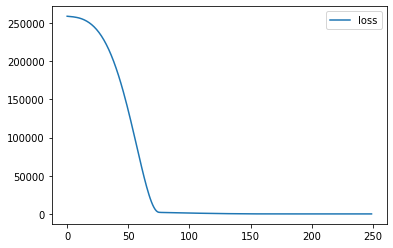

In [44]:
loss_df.plot()

#### Keras syntax part-3

In [45]:
model.evaluate(X_test,y_test,verbose=0)

# represents your model's loss on test data

29.445228576660156

In [46]:
# on test set its getting back mse this much

In [47]:
model.evaluate(X_train,y_train,verbose=0)

25.493839263916016

In [48]:
test_predictions = model.predict(X_test)

In [49]:
test_predictions

array([[653.107  ],
       [510.90576],
       [517.3978 ],
       [484.07843],
       [540.4879 ],
       [554.4554 ],
       [600.7363 ],
       [628.68805],
       [599.34564],
       [554.7111 ],
       [415.5096 ],
       [472.94208],
       [446.4047 ],
       [481.53833],
       [489.0407 ],
       [563.9778 ],
       [363.9504 ],
       [500.5967 ],
       [577.0379 ],
       [528.9831 ],
       [471.6925 ],
       [343.52585],
       [483.35803],
       [528.258  ],
       [584.39185],
       [544.4195 ],
       [364.30176],
       [551.2574 ],
       [643.65985],
       [507.0313 ],
       [563.20624],
       [484.70117],
       [554.7448 ],
       [699.2216 ],
       [379.99652],
       [432.76022],
       [460.19086],
       [430.32556],
       [380.7149 ],
       [557.4551 ],
       [327.6928 ],
       [614.939  ],
       [613.44135],
       [523.9107 ],
       [574.83624],
       [483.77966],
       [454.45197],
       [409.476  ],
       [517.78687],
       [626.5371 ],


In [50]:
test_predictions = pd.Series(test_predictions.reshape(300,))


pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [51]:
pred_df = pd.concat([pred_df, test_predictions],axis=1)

In [52]:
pred_df

,Test True Y,0
0,655.391403,653.106995
1,511.366708,510.905762
2,515.778446,517.397827
3,478.358238,484.078430
4,543.830279,540.487915
...,...,...
295,372.777436,368.778687
296,639.818362,636.268738
297,403.062564,394.182007
298,579.428431,583.003418


In [53]:
pred_df.columns = ['Test True Y','Model Prediction']

In [54]:
pred_df

,Test True Y,Model Prediction
0,655.391403,653.106995
1,511.366708,510.905762
2,515.778446,517.397827
3,478.358238,484.078430
4,543.830279,540.487915
...,...,...
295,372.777436,368.778687
296,639.818362,636.268738
297,403.062564,394.182007
298,579.428431,583.003418


<AxesSubplot:xlabel='Test True Y', ylabel='Model Prediction'>

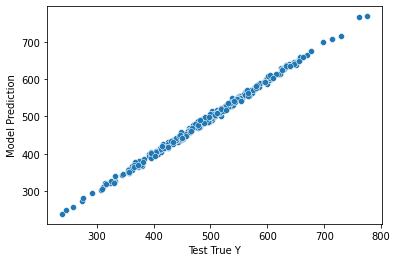

In [57]:
sns.scatterplot(x='Test True Y',y='Model Prediction',data=pred_df)

In [58]:
# i should be expecting x=y kind of plot
# that we were getting

#### Regression analysis

In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [61]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Prediction'])

4.398275267869954

In [62]:
# mse is coming 4 which is telling 
#  i am about 4 dollars off from my actual
# price prediction !!!

# Boom its good mse in this case

In [63]:
# Common question 
# how much mabse is ideal

# well that actually depends on your actual data

In [64]:
# here
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [65]:
# avg price = 500
# min = 223
# max = 774

# we are just 4 dollar missing here and there
# it's just 1% in this case which doesn't
# creates much problem

# so perfectly fine model

In [66]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Prediction'])

29.44522093638625

In [67]:
# its good mse in this case

In [68]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Prediction'])** 0.5 

5.4263450808427445

In [69]:
# rmse is just 5. ---

#### predicting on brand new data

In [70]:
new_gem = [[998,1000]]

# feature1 = 998
# feature2 - 1000

In [71]:
# but my model is trained on scaled data
# so first scale it

In [72]:
scaler.transform(new_gem)

array([[0.14117652, 0.52980619]])

In [73]:
new_gem = scaler.transform(new_gem)

In [74]:
# make the prediction on this new value

In [75]:
model.predict(new_gem)

array([[418.51044]], dtype=float32)

In [76]:
# model is telling that price should
# be somewhere around 418 dollars

* if you are running a model that takes
    long time to train you may wanna save
    that model time to time

In [77]:
from tensorflow.keras.models import load_model

In [78]:
model.save('my_gem_model.h5')

In [79]:
later_model = load_model('my_gem_model.h5')

In [80]:
# simply use this later_model
# like any other model

In [81]:
later_model.predict(new_gem)

array([[418.51044]], dtype=float32)

In [82]:
# see we got the same result